# LC Prüfungsdaten Auswertung

## Preparation

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import dataframe_image as dfi
import datetime
import warnings
import re

# Import custom functions
from data_formating import df_formatting
from plotting import calc_stats_table, calc_corr_table, generate_plots_tryexcept
from plotting import calc_stats_table_glc, calc_corr_table_glc
from word_report import create_word_report_tryexcept, create_word_report_tryexcept_glc

# Set plotting style (optional)
sns.set_theme(style="whitegrid")
warnings.simplefilter(action='ignore', category=FutureWarning)

## ZAP 1 -----------------------------------------------------------------------------

#### Datenimport

In [2]:
# --- Configuration ---
csv_file_path = '../Data/Leistungsdaten ZAP1-V2-I-SP [Archive 2024_25].csv'
header_row = 1                              # The row number (0-indexed) containing the column names.
csv_delimiter = ','                         # The character used to separate values in the CSV file (often ',' or ';')
decimal_separator = '.'                     # The character used for decimals (often '.' or ',')
file_encoding = 'utf-8'                     # File encoding (try 'utf-8', 'latin-1', 'cp1252')

current_date = datetime.date.today()
date_str = current_date.strftime("%Y-%m-%d")

# Read the CSV file into a pandas DataFrame
df_raw = pd.read_csv(csv_file_path, header=header_row, delimiter=csv_delimiter, decimal=decimal_separator, 
                     encoding=file_encoding, skipinitialspace=True)

print("CSV file loaded successfully!")
# print("First 5 rows of the data:")
# print(df_raw.head())
print("\nDataframe Info (Columns, Data Types, Non-Null Counts):")
df_raw.info()


# --- Formatting the DataFrame ---
df_cleaned, df_names = df_formatting(df_raw)

df = df_cleaned.copy()

CSV file loaded successfully!

Dataframe Info (Columns, Data Types, Non-Null Counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Columns: 309 entries, Unnamed: 0 to Resultat
dtypes: float64(12), object(297)
memory usage: 2.7+ MB
/nDropped unnamed columns.
/nThe column_id is mapped to the following Information: SUS             Schüler Informationen
SUS.1       Persönliche Informationen
SUS.1.1                      SuS-Name
SUS.2           Klassen Informationen
SUS.2.1                      Kurs-Nr.
                      ...            
ZAP1-GN                    Gesamtnote
ZAP1-AN                   Aufsatznote
ZAP1-D           Prüfungsnote Deutsch
ZAP1-M             Prüfungsnote Mathe
Resultat                     Resultat
Name: 0, Length: 297, dtype: object

The first 5 rows of the cleaned df: 
    SUS SUS.1            SUS.1.1 SUS.2             SUS.2.1 GLC1M GLC1M.1  \
7   NaN   NaN                NaN   NaN                 NaN   NaN     NaN   
8   NaN   NaN

#### M Sim

In [ ]:
# Mathe SimPrüfung Stats Tabelle
pattern_serien = r"SP[1-5]A.1.6$" # $ works like an anchor - so it has to match the end of the string
serien = [item for item in df.columns if re.match(pattern_serien, item)]
print(serien)
erfolgsnote = "ZAP1-M"


df_stats, m_table = calc_stats_table(df, df_names, sn=serien, en=erfolgsnote)
dfi.export(m_table, "m_simpr_stats_table.png", table_conversion='matplotlib')
#save_styled_dataframe_to_png(m_table, "m_simpr_stats_table.png", width=2600, height=500, row_name_width_px=150, min_column_width_px=110)


# Korellationstabellen
for i, serie in enumerate(serien):
    corr_table = calc_corr_table(df, df_names, f"SP{i+1}M.1.", serie, erfolgsnote)
    dfi.export(corr_table, f"m_simpr{i+1}_corr_table.png", table_conversion='matplotlib')
    #save_styled_dataframe_to_png(corr_table, f"m_simpr{i+1}_corr_table.png", width=1900, height=600, row_name_width_px=150, min_column_width_px=80)


# Scatter Plots und Histogramme
xtic = ['Serie 1 (all)', 'Serie 2 (all)', 'Serie 3 (all)', 'Serie 4 (all)','Serie 5 (all)', 
        'Serie 1 (mit EN)', 'Serie 2 (mit EN)', 'Serie 3 (mit EN)', 'Serie 4 (mit EN)', 'Serie 5 (mit EN)',
        'EN (Serie 1)', 'EN (Serie 2)', 'EN (Serie 3)', 'EN (Serie 4)', 'EN (Serie 5)']
x_lineplot = ['Serie 1', 'Serie 2', 'Serie 3', 'Serie 4', 'Serie 5']
generate_plots_tryexcept(df_stats, sn=serien, en=erfolgsnote, xtic=xtic, x_labels_lineplot=x_lineplot, show_fig=False)


create_word_report_tryexcept(
    title="Leistungsdaten Analyse ZAP1_M SimPr (2024/25)",
    stats_table_png_path="m_simpr_stats_table.png",
    overview_paths=["m_line_plot.png", "m_violin_plot.png", "m_pass_fail_bar_plot.png", "m_all_success_chance.png"],
    scatter_plot_paths=[f"m_simpr{i}_vs_zap1-m.png" for i in range(1, 6)],
    histogram_paths=[f"m_simpr{i}_histograms.png" for i in range(1, 6)],
    success_paths=[f"m_simpr{i}_success_chance.png" for i in range(1, 6)],
    corr_table_paths=[f"m_simpr{i}_corr_table.png" for i in range(1, 6)],
    output_filename=f"Leistungsdaten Analyse ZAP1_M SimPr 2024-25 ({date_str}).docx",
    remove_files=True
)


#### D Sim

C:\Users\elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


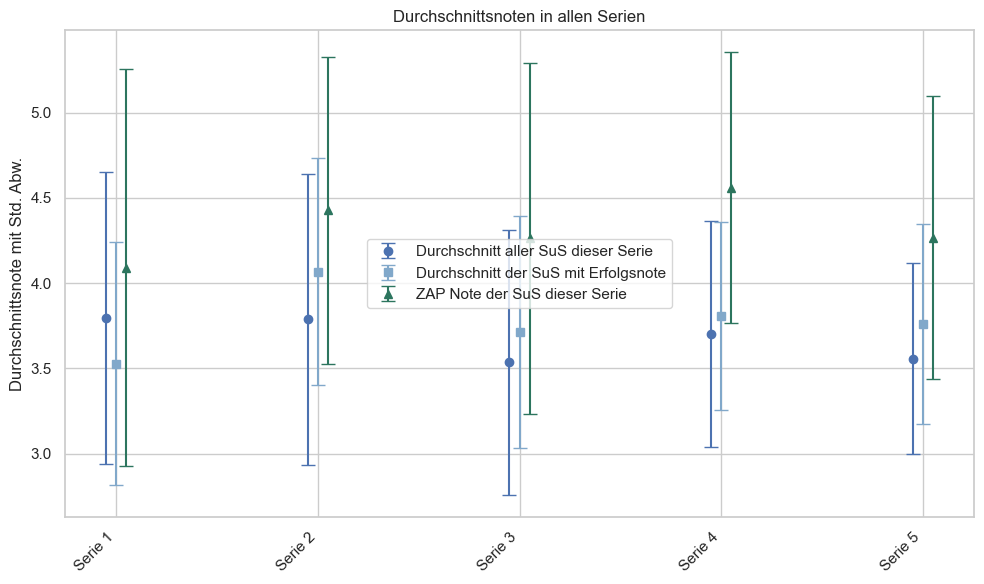

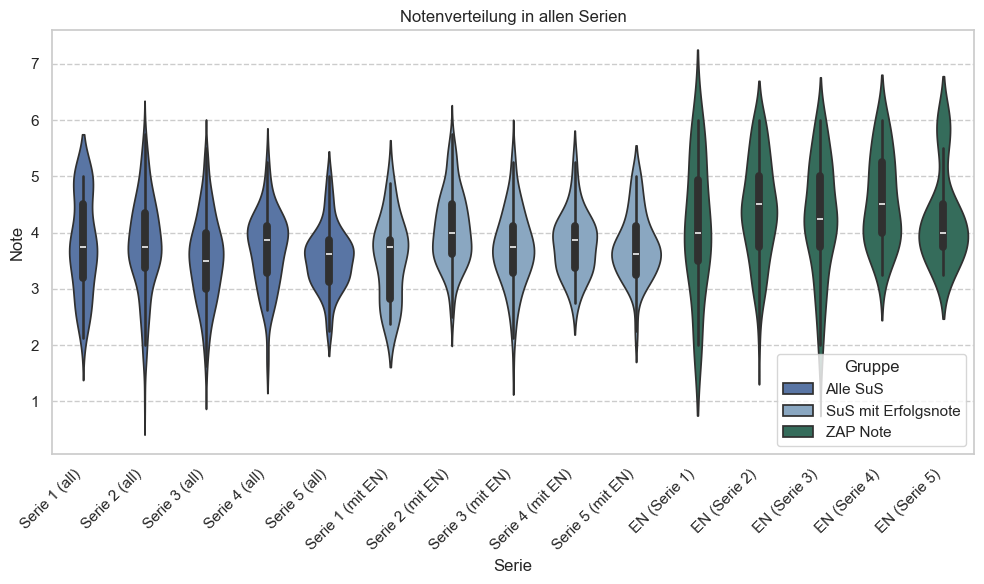

Plots generated successfully!
Word report 'Leistungsdaten Analyse ZAP1_D SimPr 2024-25 (2025-07-02).docx' created successfully!


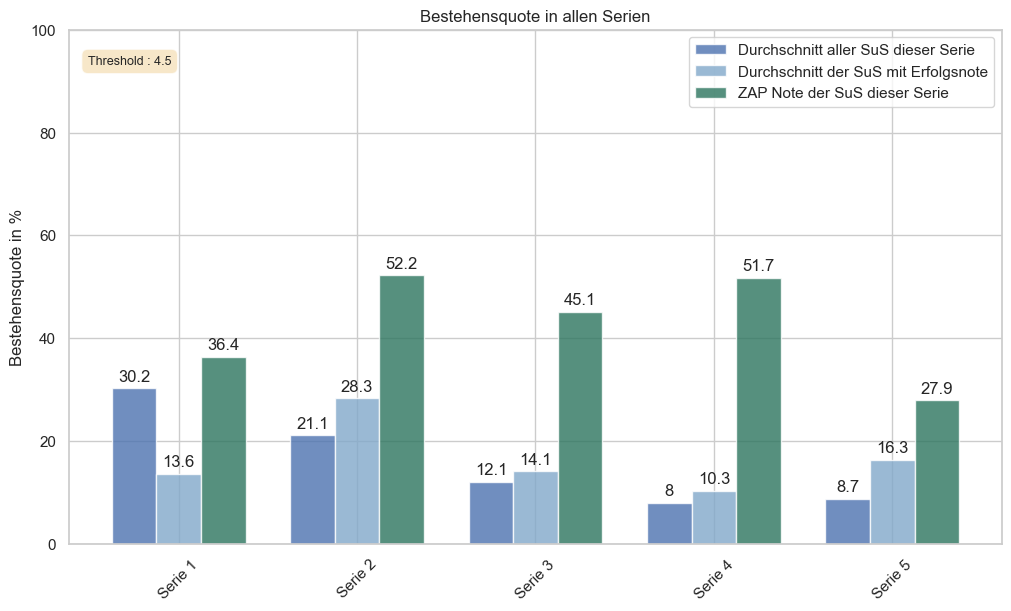

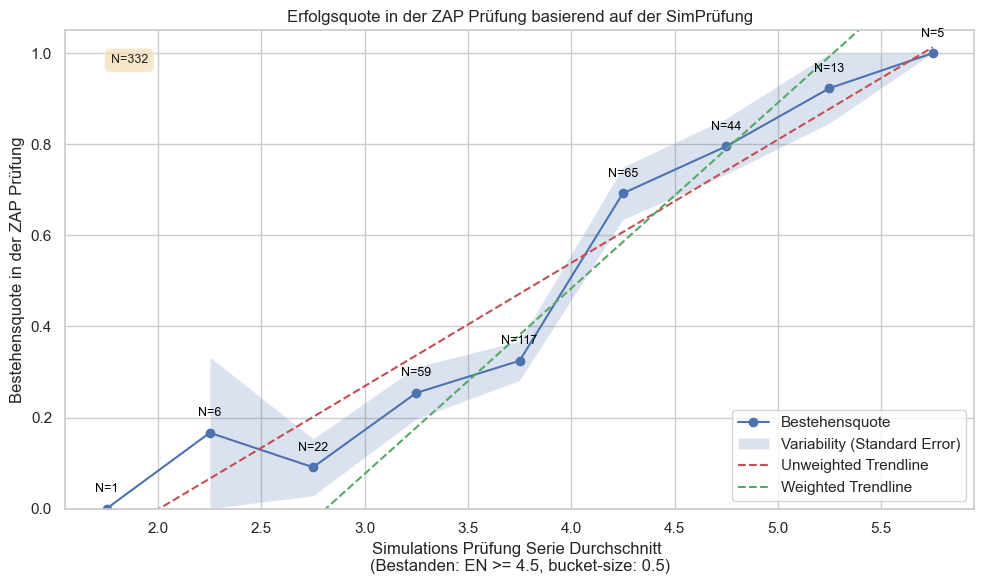

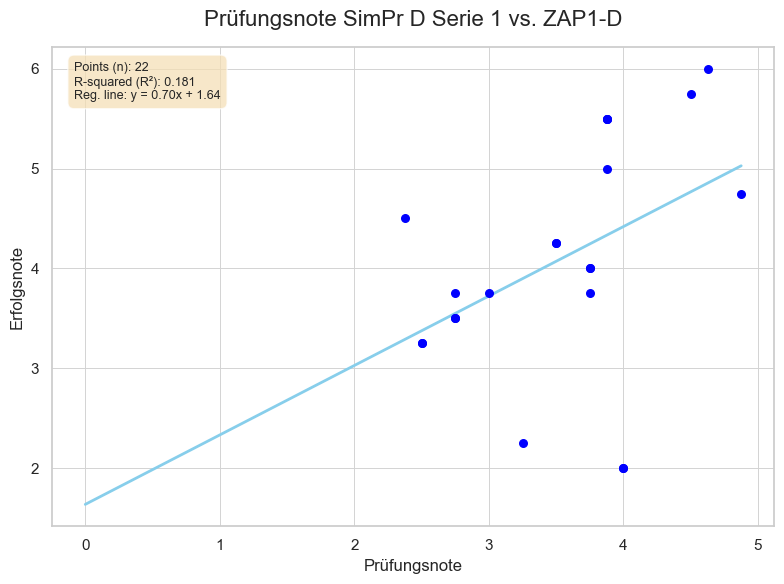

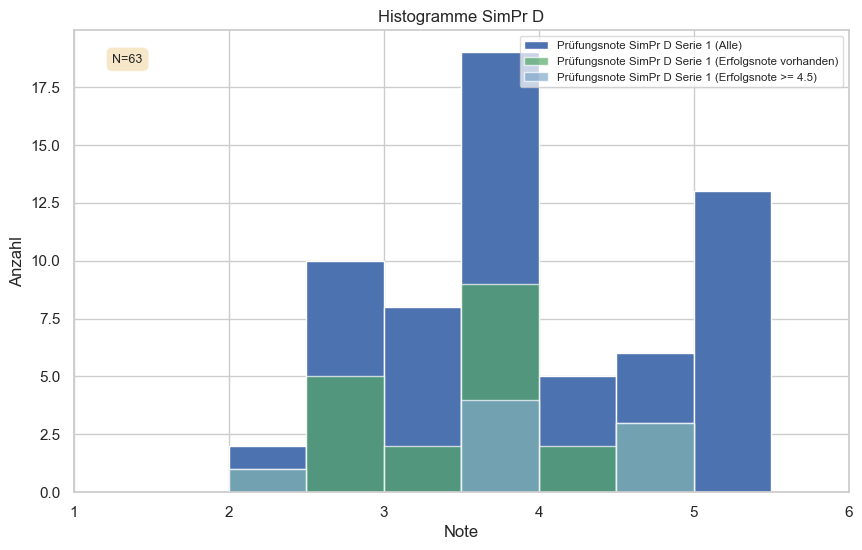

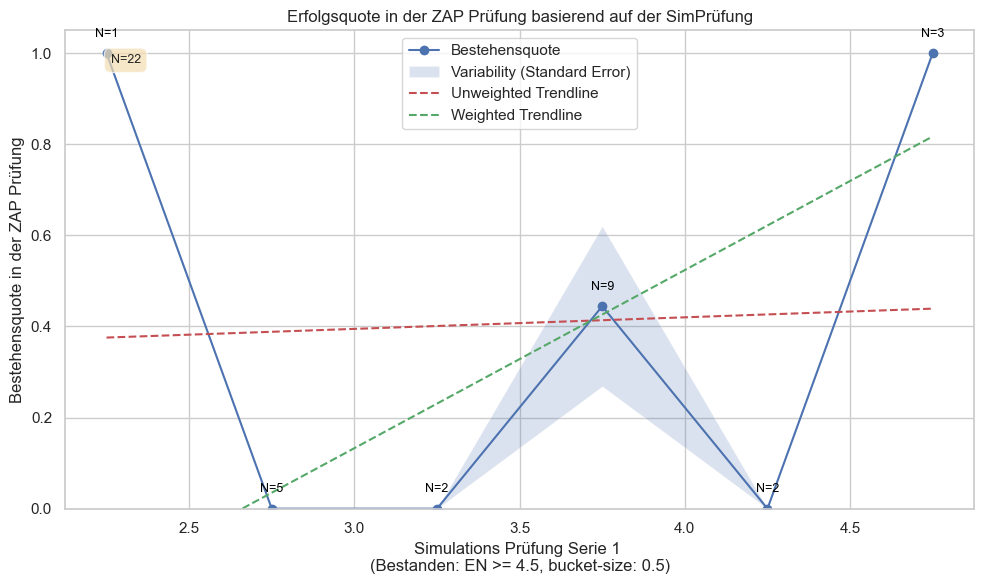

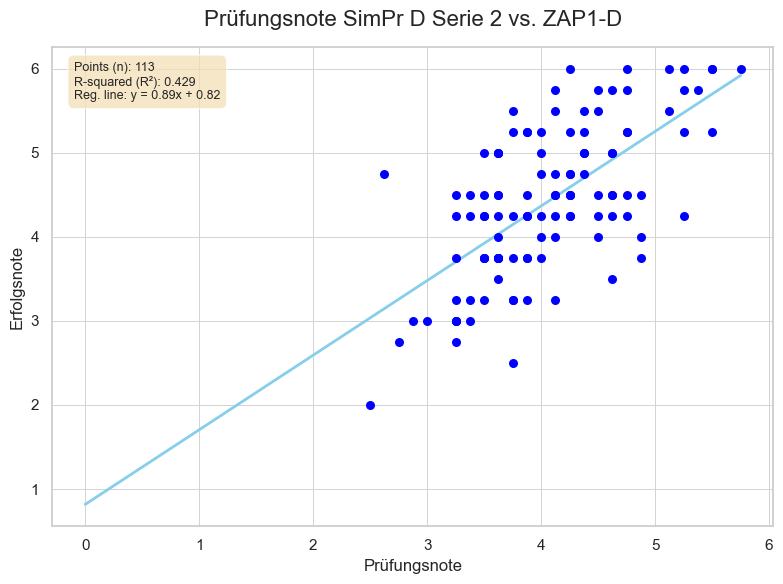

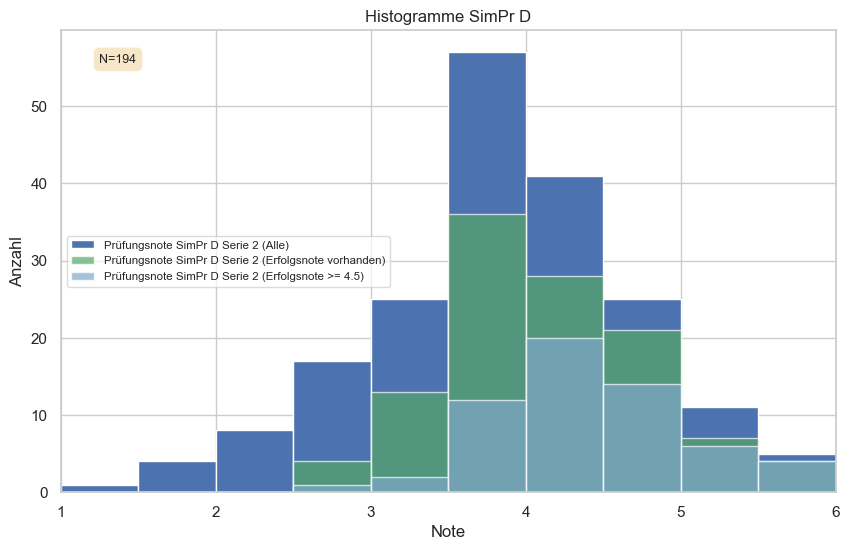

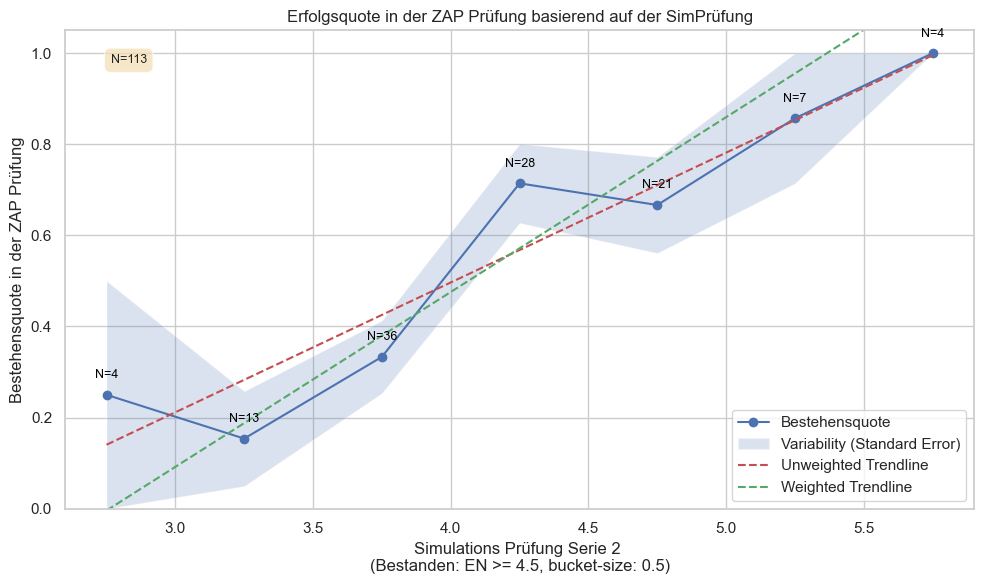

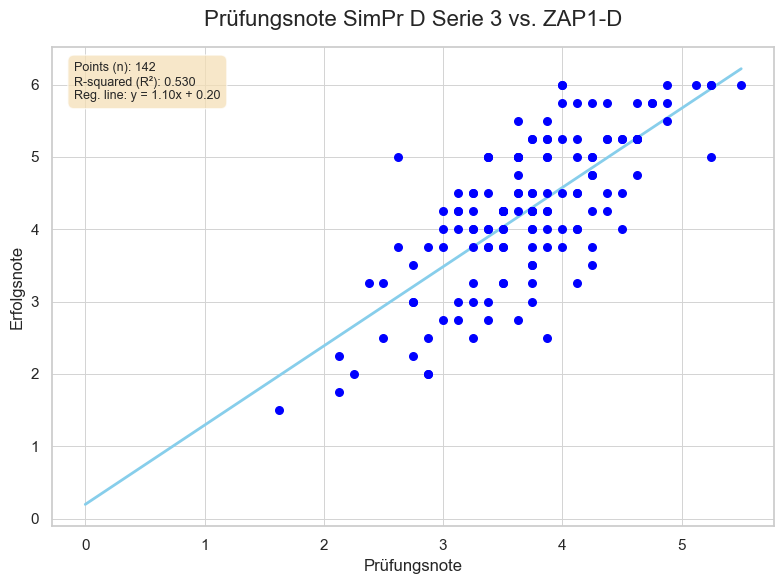

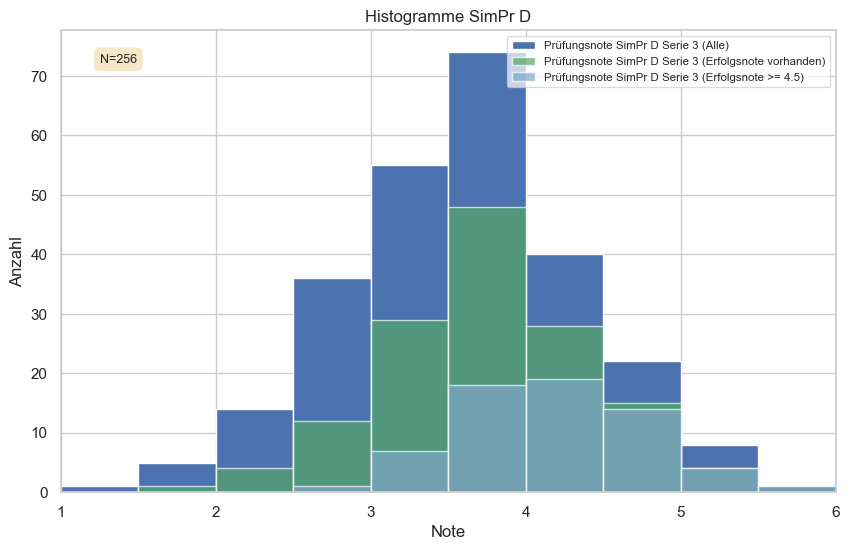

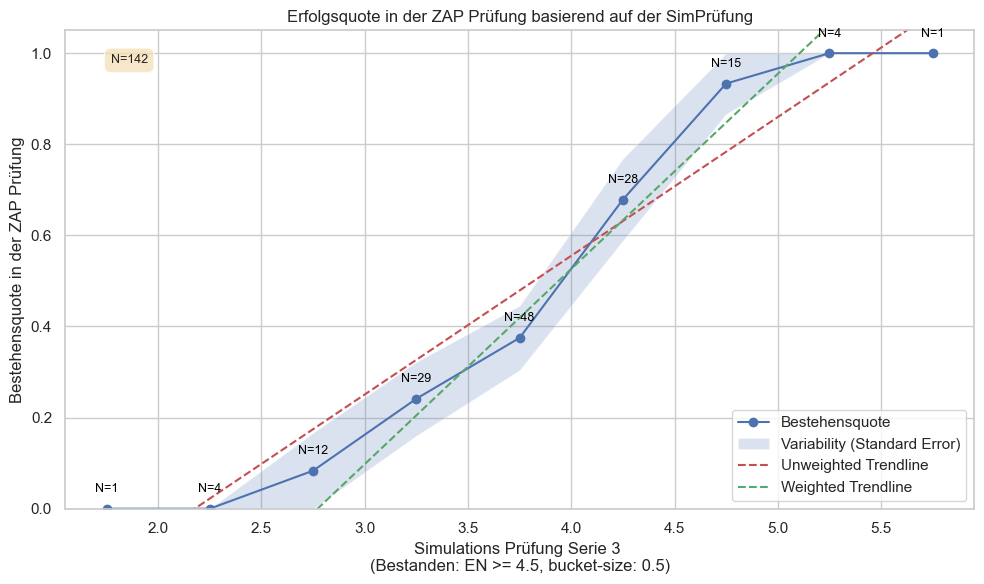

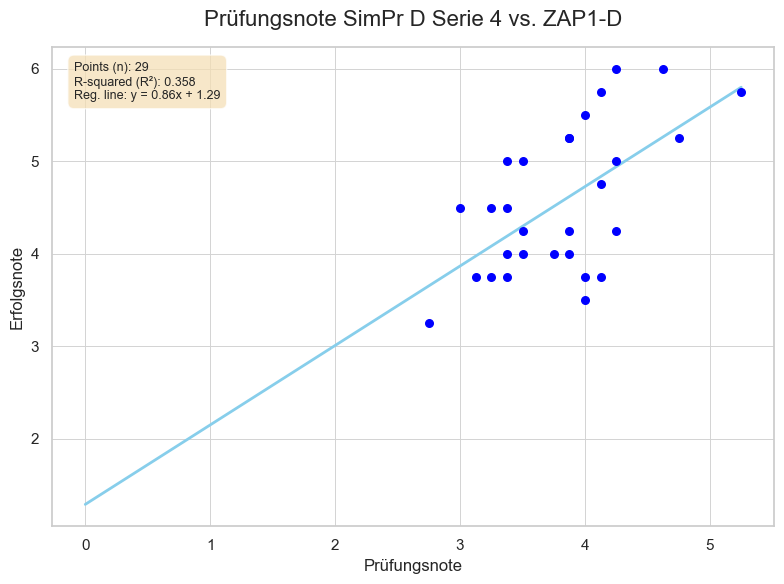

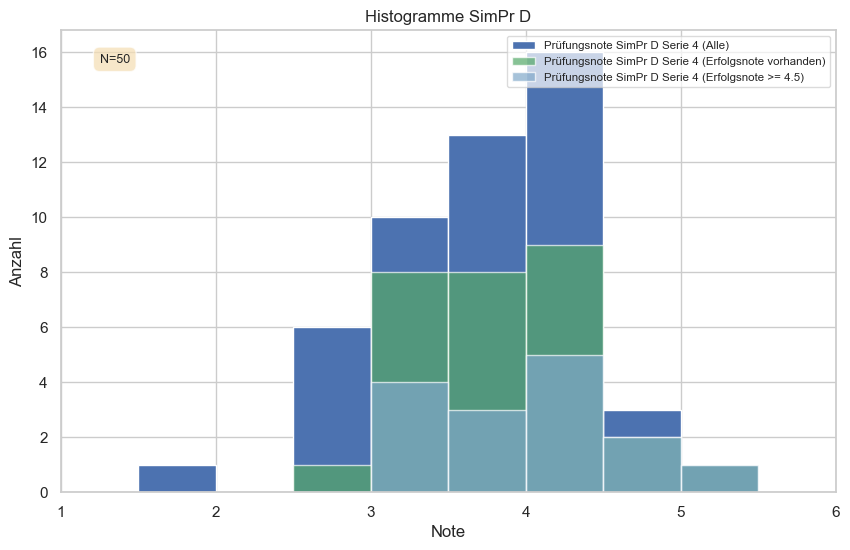

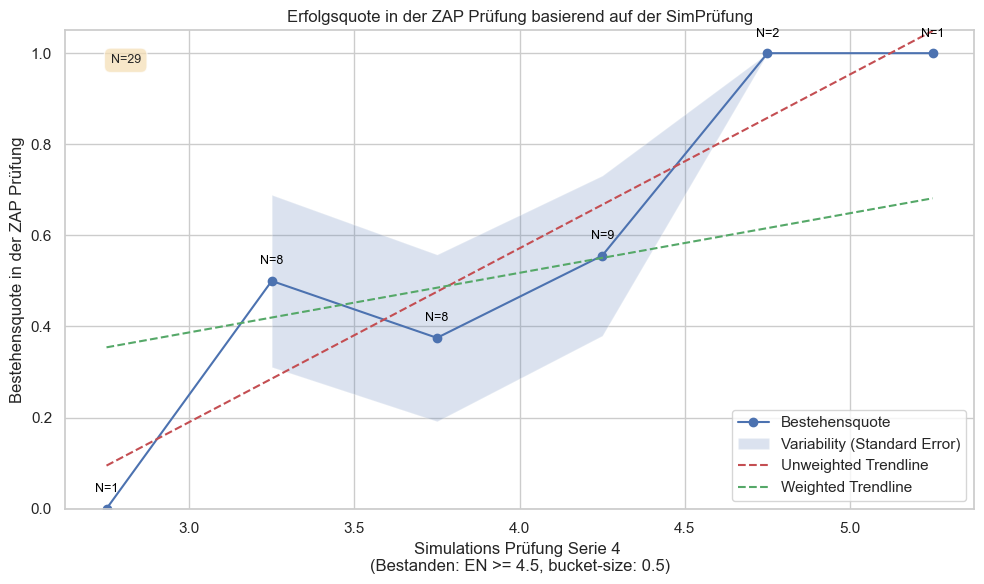

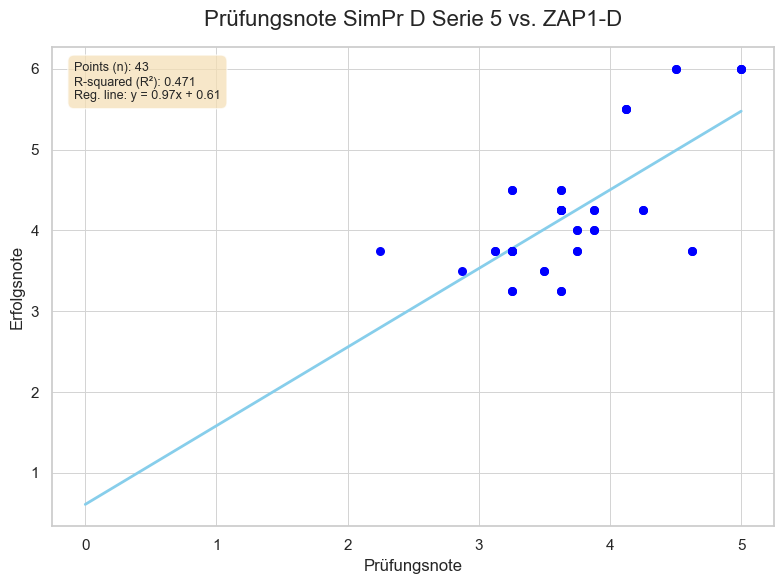

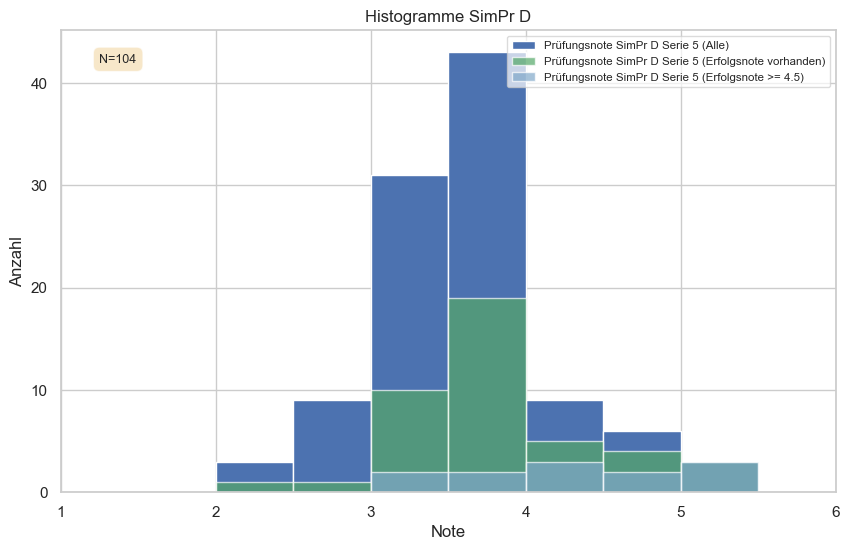

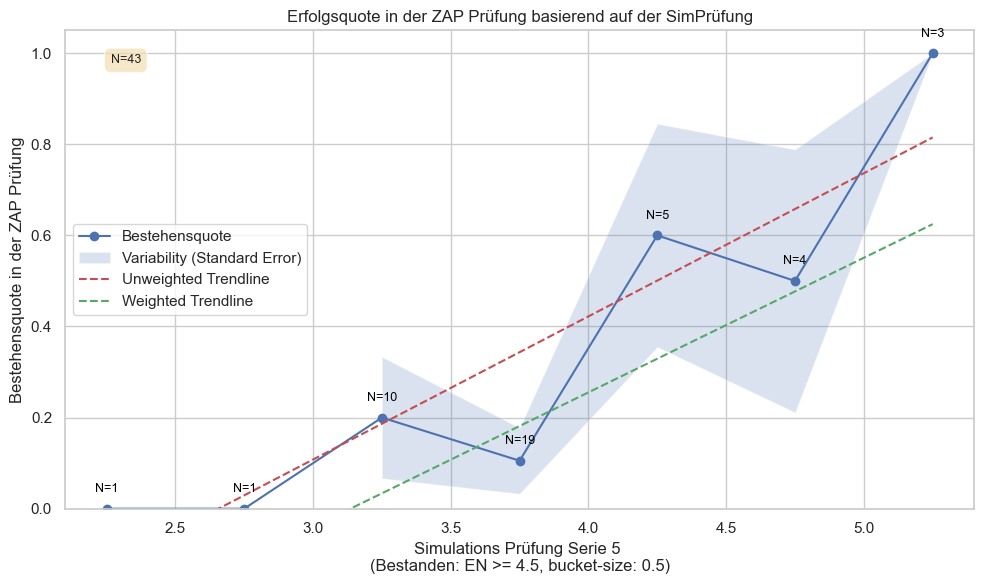

In [4]:
# Deutsch SimPrüfung Stats Tabelle
pattern_serien = r"SP[1-5]A.1.5$" # $ works like an anchor - so it has to match the end of the string
serien = [item for item in df.columns if re.match(pattern_serien, item)]
erfolgsnote = "ZAP1-D"

df_stats, m_table = calc_stats_table(df, df_names, sn=serien, en=erfolgsnote)
dfi.export(m_table, "d_simpr_stats_table.png", table_conversion='matplotlib')
#save_styled_dataframe_to_png(m_table, "d_simpr_stats_table.png", width=2600, height=600, row_name_width_px=150, min_column_width_px=110)


# Korellationstabellen
for i, serie in enumerate(serien):
    corr_table = calc_corr_table(df, df_names, (f"SP{i+1}D.1.", f"SP{i+1}D.2."), serie, erfolgsnote)
    dfi.export(corr_table, f"d_simpr{i+1}_corr_table.png", table_conversion='matplotlib')
    #save_styled_dataframe_to_png(corr_table, f"d_simpr{i+1}_corr_table.png", width=1800, height=600, row_name_width_px=150, min_column_width_px=80)


# Scatter Plots und Histogramme
xtic = ['Serie 1 (all)', 'Serie 2 (all)', 'Serie 3 (all)', 'Serie 4 (all)','Serie 5 (all)', 
        'Serie 1 (mit EN)', 'Serie 2 (mit EN)', 'Serie 3 (mit EN)', 'Serie 4 (mit EN)', 'Serie 5 (mit EN)',
        'EN (Serie 1)', 'EN (Serie 2)', 'EN (Serie 3)', 'EN (Serie 4)', 'EN (Serie 5)']
x_lineplot = ['Serie 1', 'Serie 2', 'Serie 3', 'Serie 4', 'Serie 5']
generate_plots_tryexcept(df_stats, sn=serien, en=erfolgsnote, xtic=xtic, x_labels_lineplot=x_lineplot, show_fig=False)


create_word_report_tryexcept(
    title="Leistungsdaten Analyse ZAP1_D SimPr (2024/25)",
    stats_table_png_path="d_simpr_stats_table.png",
    overview_paths=["d_line_plot.png", "d_violin_plot.png", "d_pass_fail_bar_plot.png", "d_all_success_chance.png"],
    scatter_plot_paths=[f"d_simpr{i}_vs_zap1-d.png" for i in range(1, len(serien)+1)],
    histogram_paths=[f"d_simpr{i}_histograms.png" for i in range(1, len(serien)+1)],
    success_paths=[f"d_simpr{i}_success_chance.png" for i in range(1, len(serien)+1)],
    corr_table_paths=[f"d_simpr{i}_corr_table.png" for i in range(1, len(serien)+1)],
    output_filename=f"Leistungsdaten Analyse ZAP1_D SimPr 2024-25 ({date_str}).docx",
    remove_files=True
)

#### D Aufsatz

In [ ]:
# Deutsch SimPrüfung Stats Tabelle
pattern_serien = r"SP[1-5]A.1.1$" # $ works like an anchor - so it has to match the end of the string
serien = [item for item in df.columns if re.match(pattern_serien, item)]
erfolgsnote = "ZAP1-AN"

df_stats, m_table = calc_stats_table(df, df_names, sn=serien, en=erfolgsnote)
dfi.export(m_table, "an_simpr_stats_table.png", table_conversion='matplotlib')
#save_styled_dataframe_to_png(m_table, "an_simpr_stats_table.png", width=2600, height=600, row_name_width_px=150, min_column_width_px=110)


"""
# Korellationstabellen
for i, serie in enumerate(serien):
    corr_table = calc_corr_table(df, df_names, f"SP{i+1}D.3.1", serie, erfolgsnote)
    save_styled_dataframe_to_png(corr_table, f"an_simpr{i+1}_corr_table.png", width=1500, height=600, row_name_width_px=150, min_column_width_px=80)
"""

# Scatter Plots und Histogramme
xtic = ['Serie 1 (all)', 'Serie 2 (all)', 'Serie 3 (all)', 'Serie 4 (all)','Serie 5 (all)', 
        'Serie 1 (mit EN)', 'Serie 2 (mit EN)', 'Serie 3 (mit EN)', 'Serie 4 (mit EN)', 'Serie 5 (mit EN)',
        'EN (Serie 1)', 'EN (Serie 2)', 'EN (Serie 3)', 'EN (Serie 4)', 'EN (Serie 5)']
x_lineplot = ['Serie 1', 'Serie 2', 'Serie 3', 'Serie 4', 'Serie 5']
generate_plots_tryexcept(df_stats, sn=serien, en=erfolgsnote, xtic=xtic, x_labels_lineplot=x_lineplot, show_fig=False)

create_word_report_tryexcept(
    title="Leistungsdaten Analyse ZAP1_AN SimPr (2024/25)",
    stats_table_png_path="an_simpr_stats_table.png",
    overview_paths=["an_line_plot.png", "an_violin_plot.png", "an_pass_fail_bar_plot.png", "an_all_success_chance.png"],
    scatter_plot_paths=[f"an_simpr{i}_vs_zap1-an.png" for i in range(1, 6)],
    histogram_paths=[f"an_simpr{i}_histograms.png" for i in range(1, 6)],
    success_paths=[f"an_simpr{i}_success_chance.png" for i in range(1, 6)],
    corr_table_paths=[f"an_simpr{i}_corr_table.png" for i in range(1, 6)],
    output_filename=f"Leistungsdaten Analyse ZAP1_AN SimPr 2024-25 ({date_str}).docx",
    remove_files=True
)

## ZAP 2 -----------------------------------------------------------------------------

#### Datenimport

In [5]:
# --- Configuration ---
csv_file_path = '../Data/Leistungsdaten ZAP2-V2-I-SP [Archive 2024_25].csv'
header_row = 1                              # The row number (0-indexed) containing the column names.
csv_delimiter = ','                         # The character used to separate values in the CSV file (often ',' or ';')
decimal_separator = '.'                     # The character used for decimals (often '.' or ',')
file_encoding = 'utf-8'                     # File encoding (try 'utf-8', 'latin-1', 'cp1252')

current_date = datetime.date.today()
date_str = current_date.strftime("%Y-%m-%d")

# Read the CSV file into a pandas DataFrame
df_raw = pd.read_csv(csv_file_path, header=header_row, delimiter=csv_delimiter, decimal=decimal_separator, 
                     encoding=file_encoding, skipinitialspace=True)

print("CSV file loaded successfully!")
# print("First 5 rows of the data:")
# print(df_raw.head())
print("\nDataframe Info (Columns, Data Types, Non-Null Counts):")
df_raw.info()


# --- Formatting the DataFrame ---
df_cleaned, df_names = df_formatting(df_raw)

df = df_cleaned.copy()

CSV file loaded successfully!

Dataframe Info (Columns, Data Types, Non-Null Counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Columns: 214 entries, SUS to Resultat
dtypes: float64(37), object(177)
memory usage: 1.2+ MB
/nDropped unnamed columns.
/nThe column_id is mapped to the following Information: SUS             Schüler Informationen
SUS.1       Persönliche Informationen
SUS.1.1                        SuS-ID
SUS.2           Klassen Informationen
SUS.2.1                      Kurs-Nr.
                      ...            
ZAP2-GN                    Gesamtnote
ZAP2-AN                   Aufsatznote
ZAP2-D           Prüfungsnote Deutsch
ZAP2-M             Prüfungsnote Mathe
Resultat                     Resultat
Name: 0, Length: 203, dtype: object

The first 5 rows of the cleaned df: 
    SUS SUS.1          SUS.1.1 SUS.2 SUS.2.1 SUS.2.2 SUS.2.3 SUS.2.4 GLC1D  \
7   NaN   NaN   5-ZAP2-V2-SaM5   NaN     NaN     NaN     NaN     NaN   55%   
8   NaN   NaN   5-

#### M GLC

In [ ]:
# Mathe GLC Stats Tabelle
pattern_serien = r"GLC1M$" # $ works like an anchor - so it has to match the end of the string
serien = [item for item in df.columns if re.match(pattern_serien, item)]
erfolgsnote = "ZAP2-M"

percent_for_grade_1=0
percent_for_grade_6=95

df_stats, m_table = calc_stats_table_glc(df, df_names, sn=serien, en=erfolgsnote, 
                                         percent_for_grade_1=percent_for_grade_1, 
                                         percent_for_grade_6=percent_for_grade_6)
dfi.export(m_table, "m_glc_stats_table.png", table_conversion='matplotlib')
#save_styled_dataframe_to_png(m_table, "m_glc_stats_table.png", width=800, height=600, row_name_width_px=150, min_column_width_px=80)


# Korellationstabellen
for i, serie in enumerate(serien):
    corr_table = calc_corr_table_glc(df, df_names, "GLC1M.", serie, erfolgsnote, 
                                         percent_for_grade_1=percent_for_grade_1, 
                                         percent_for_grade_6=percent_for_grade_6)
    dfi.export(corr_table, "m_glc_corr_table.png", table_conversion='matplotlib')
    #save_styled_dataframe_to_png(corr_table, f"m_glc_corr_table.png", width=600, height=500, row_name_width_px=150, min_column_width_px=80)


# Scatter Plots und Histogramme
xtic = ['GLC (all)', 'GLC (mit EN)', 'EN']
x_lineplot = ['GLC']
generate_plots_tryexcept(df_stats, sn=serien, en=erfolgsnote, xtic=xtic, x_labels_lineplot=x_lineplot, show_fig=False)


create_word_report_tryexcept_glc(
    title="Leistungsdaten Analyse ZAP2_M GLC 2024/25",
    stats_table_png_path="m_glc_stats_table.png",
    overview_paths=["m_line_plot.png", "m_violin_plot.png", "m_pass_fail_bar_plot.png"],
    scatter_plot_paths=["m_glc_vs_zap2-m.png"],
    histogram_paths=["m_glc_histograms.png"],
    success_paths=["m_glc_success_chance.png"],
    corr_table_paths=["m_glc_corr_table.png"],
    output_filename=f"Leistungsdaten Analyse ZAP2_M GLC 2024-25 ({date_str}).docx",
    percent_for_grade_1=percent_for_grade_1,
    percent_for_grade_6=percent_for_grade_6,
    remove_files=True
)

#### D GLC

In [ ]:
# Mathe GLC Stats Tabelle
pattern_serien = r"GLC1D$" # $ works like an anchor - so it has to match the end of the string
serien = [item for item in df.columns if re.match(pattern_serien, item)]
erfolgsnote = "ZAP2-D"

percent_for_grade_1=0
percent_for_grade_6=95

df_stats, m_table = calc_stats_table_glc(df, df_names, sn=serien, en=erfolgsnote, 
                                         percent_for_grade_1=percent_for_grade_1, 
                                         percent_for_grade_6=percent_for_grade_6)
dfi.export(m_table, "d_glc_stats_table.png", table_conversion='matplotlib')
#save_styled_dataframe_to_png(m_table, "d_glc_stats_table.png", width=800, height=600, row_name_width_px=150, min_column_width_px=80)


# Korellationstabellen
for i, serie in enumerate(serien):
    corr_table = calc_corr_table_glc(df, df_names, "GLC1D.", serie, erfolgsnote, 
                                         percent_for_grade_1=percent_for_grade_1, 
                                         percent_for_grade_6=percent_for_grade_6)
    dfi.export(corr_table, f"d_glc_corr_table.png", table_conversion='matplotlib')
    #save_styled_dataframe_to_png(corr_table, f"d_glc_corr_table.png", width=600, height=700, row_name_width_px=150, min_column_width_px=80)


# Scatter Plots und Histogramme
xtic = ['GLC (all)', 'GLC (mit EN)', 'EN']
x_lineplot = ['GLC']
generate_plots_tryexcept(df_stats, sn=serien, en=erfolgsnote, xtic=xtic, x_labels_lineplot=x_lineplot, show_fig=False)


create_word_report_tryexcept_glc(
    title="Leistungsdaten Analyse ZAP2_D GLC 2024/25",
    stats_table_png_path="d_glc_stats_table.png",
    overview_paths=["d_line_plot.png", "d_violin_plot.png", "d_pass_fail_bar_plot.png"],
    scatter_plot_paths=["d_glc_vs_zap2-d.png"],
    histogram_paths=["d_glc_histograms.png"],
    success_paths=["d_glc_success_chance.png"],
    corr_table_paths=["d_glc_corr_table.png"],
    output_filename=f"Leistungsdaten Analyse ZAP2_D GLC 2024-25 ({date_str}).docx",
    percent_for_grade_1=percent_for_grade_1,
    percent_for_grade_6=percent_for_grade_6,
    remove_files=True
)

#### M Sim

In [ ]:
# Mathe SimPrüfung Stats Tabelle
pattern_serien = r"SP[1-3]\.7$" # $ works like an anchor - so it has to match the end of the string
serien = [item for item in df.columns if re.match(pattern_serien, item)]
print(serien)
erfolgsnote = "ZAP2-M"


df_stats, m_table = calc_stats_table(df, df_names, sn=serien, en=erfolgsnote)
dfi.export(m_table, "m_simpr_stats_table.png", table_conversion='matplotlib')
#save_styled_dataframe_to_png(m_table, "m_simpr_stats_table.png", width=2600, height=500, row_name_width_px=150, min_column_width_px=110)


# Korellationstabellen
for i, serie in enumerate(serien):
    corr_table = calc_corr_table(df, df_names, f"SP{i+1}M", serie, erfolgsnote)
    dfi.export(corr_table, f"m_simpr{i+1}_corr_table.png", table_conversion='matplotlib')
    #save_styled_dataframe_to_png(corr_table, f"m_simpr{i+1}_corr_table.png", width=1900, height=600, row_name_width_px=150, min_column_width_px=80)


# Scatter Plots und Histogramme
xtic = ['Serie 1 (all)', 'Serie 2 (all)', 'Serie 3 (all)', 
        'Serie 1 (mit EN)', 'Serie 2 (mit EN)', 'Serie 3 (mit EN)',
        'EN (Serie 1)', 'EN (Serie 2)', 'EN (Serie 3)']
x_lineplot = ['Serie 1', 'Serie 2', 'Serie 3']
generate_plots_tryexcept(df_stats, sn=serien, en=erfolgsnote, xtic=xtic, x_labels_lineplot=x_lineplot, show_fig=False)


create_word_report_tryexcept(
    title="Leistungsdaten Analyse ZAP2_M SimPr (2024/25)",
    stats_table_png_path="m_simpr_stats_table.png",
    overview_paths=["m_line_plot.png", "m_violin_plot.png", "m_pass_fail_bar_plot.png", "m_all_success_chance.png"],
    scatter_plot_paths=[f"m_simpr{i}_vs_zap2-m.png" for i in range(1, 6)],
    histogram_paths=[f"m_simpr{i}_histograms.png" for i in range(1, 6)],
    success_paths=[f"m_simpr{i}_success_chance.png" for i in range(1, 6)],
    corr_table_paths=[f"m_simpr{i}_corr_table.png" for i in range(1, 6)],
    output_filename=f"Leistungsdaten Analyse ZAP2_M SimPr 2024-25 ({date_str}).docx",
    remove_files=True
)


#### D Sim

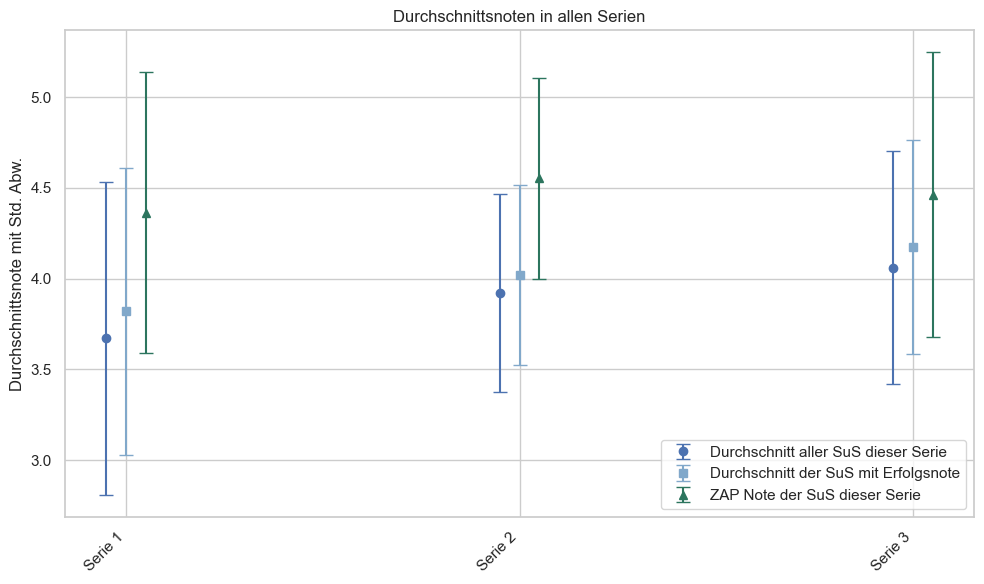

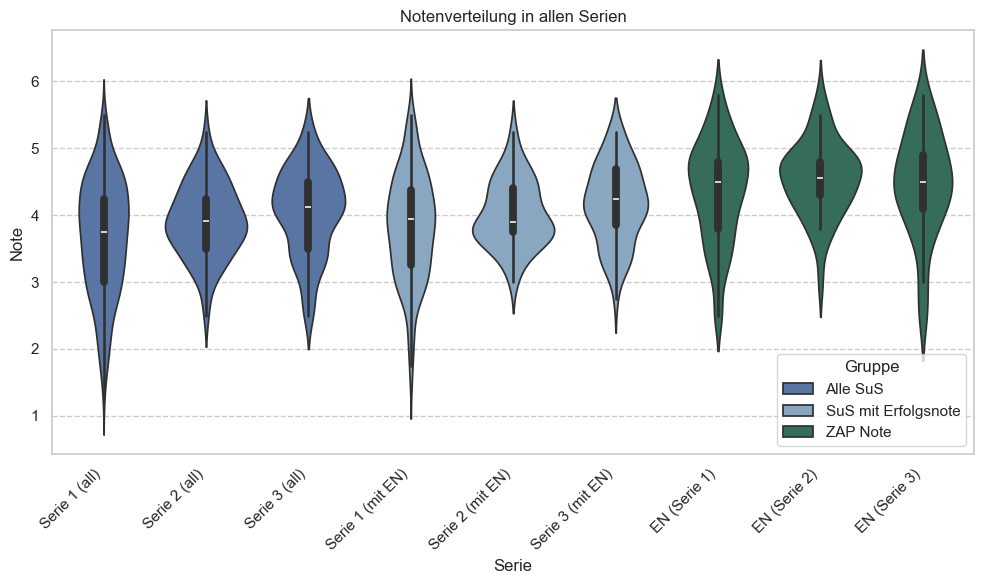

Plots generated successfully!
Word report 'Leistungsdaten Analyse ZAP2_D SimPr 2024-25 (2025-07-02).docx' created successfully!


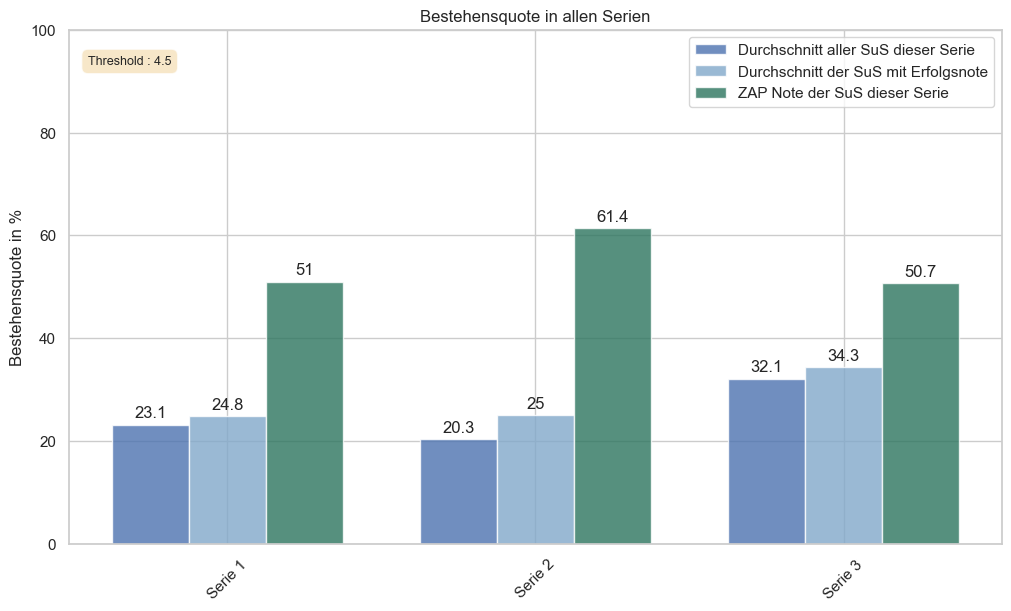

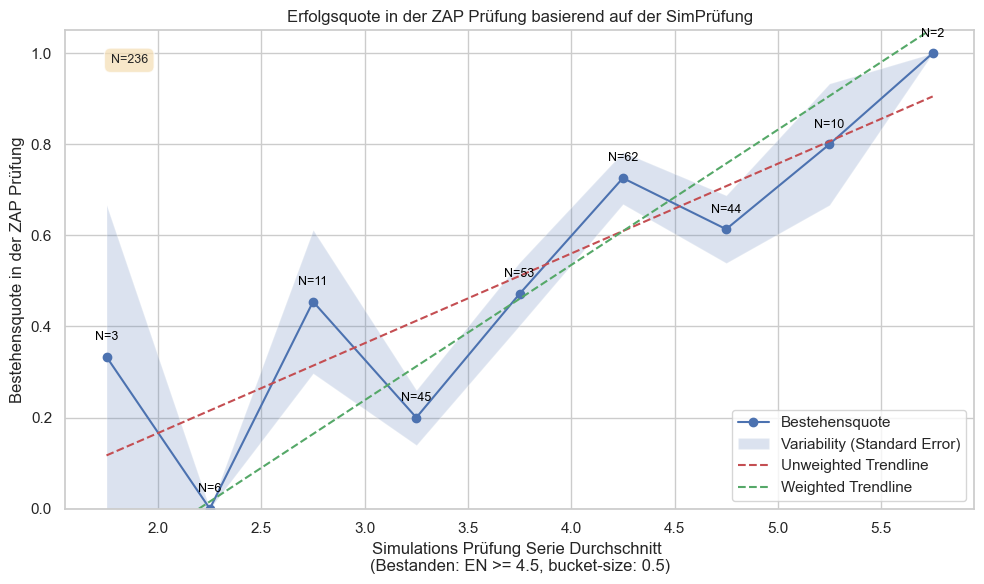

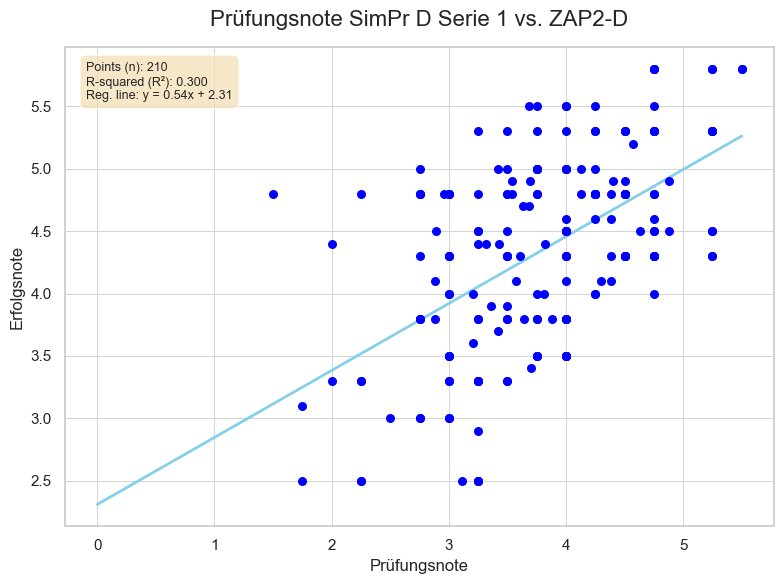

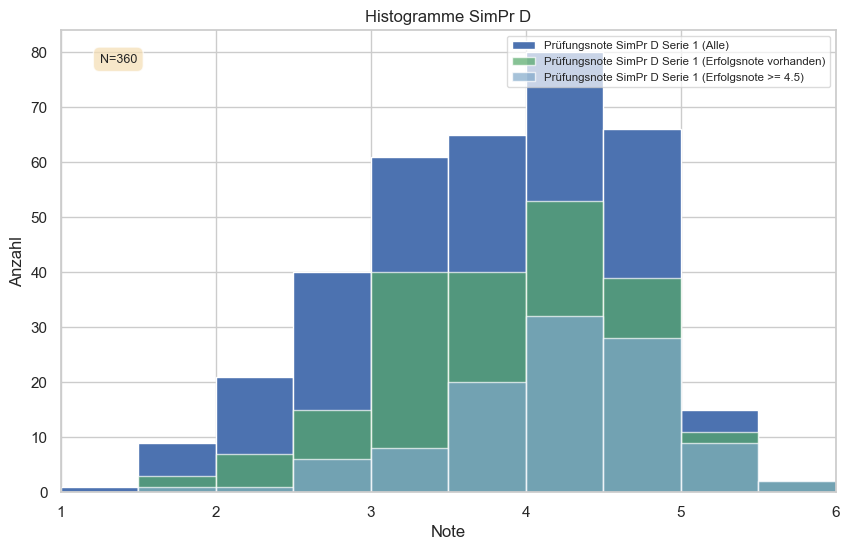

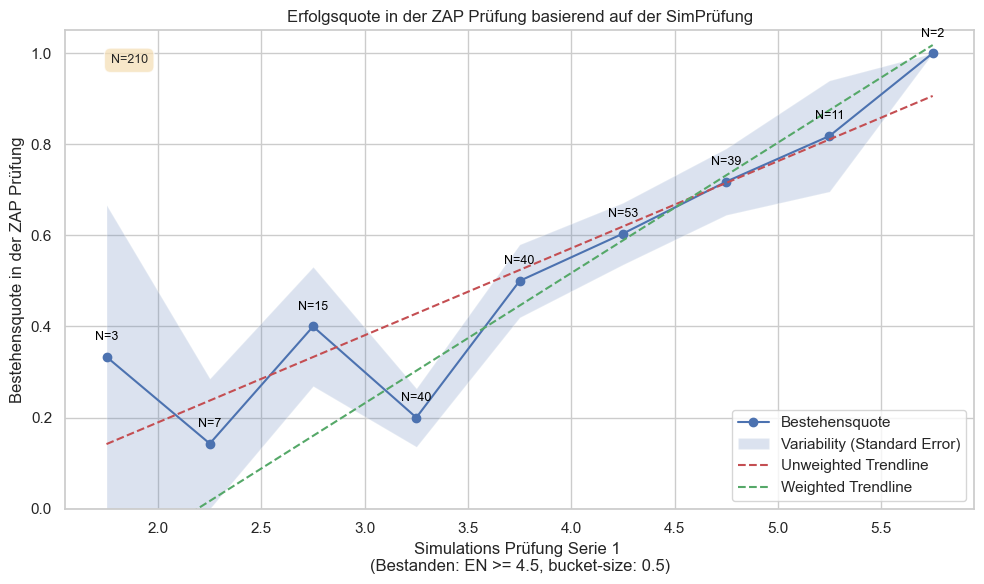

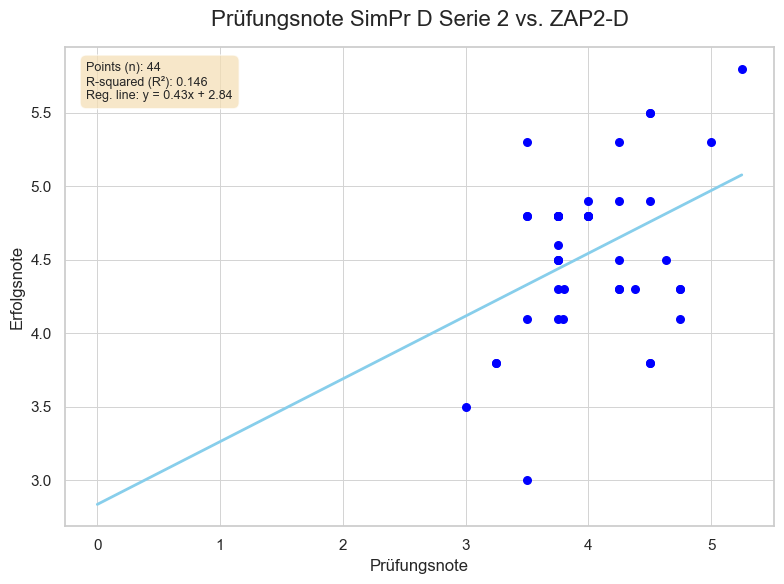

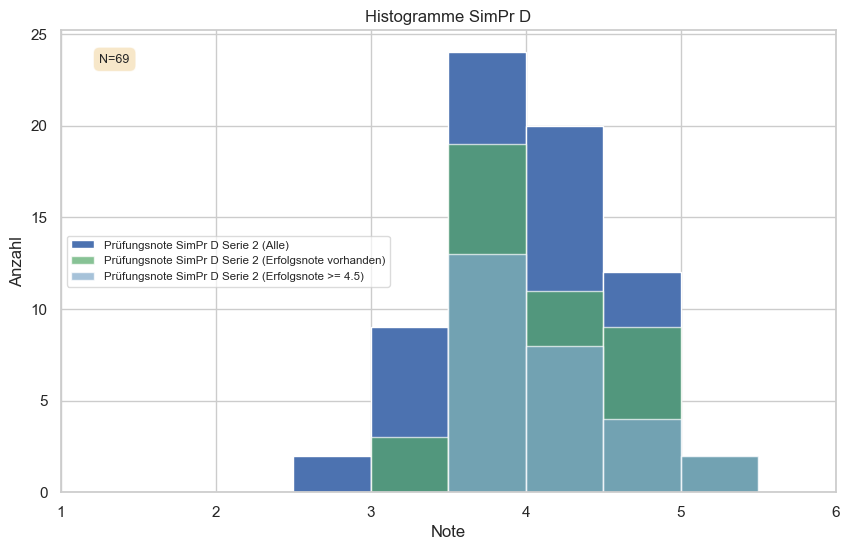

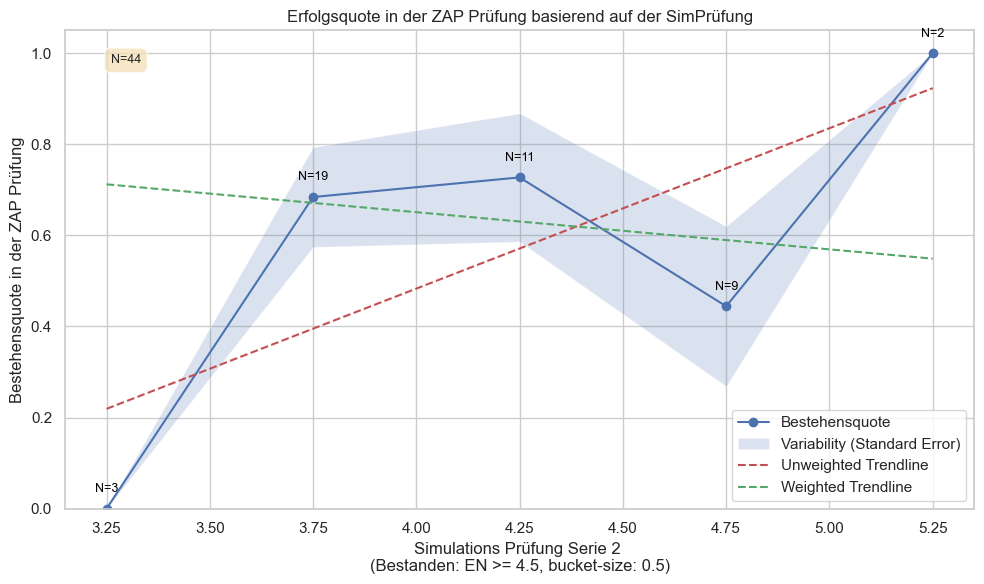

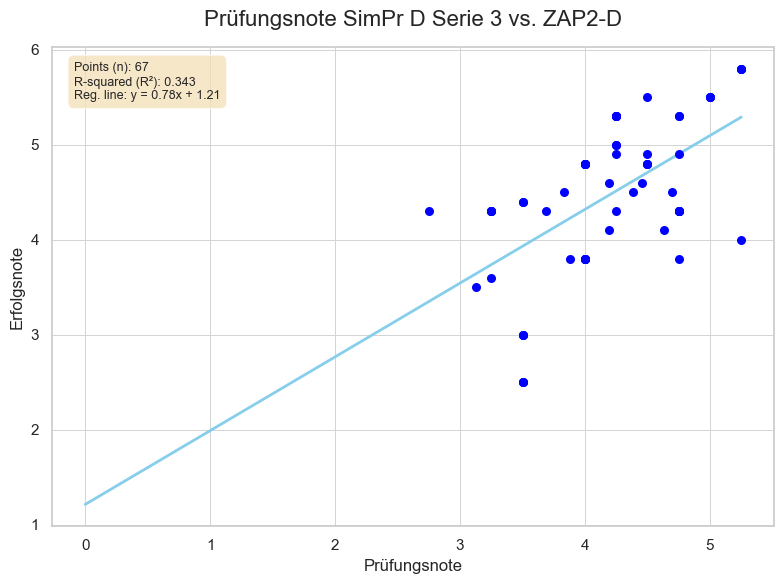

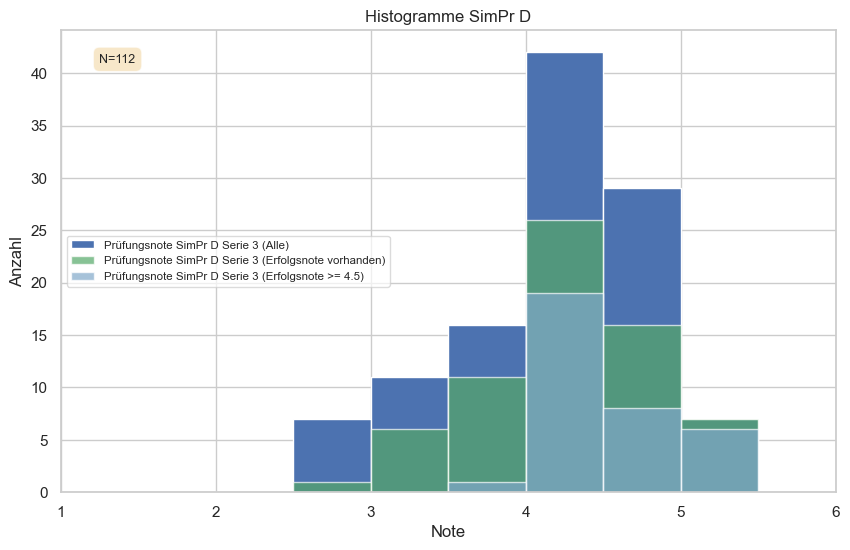

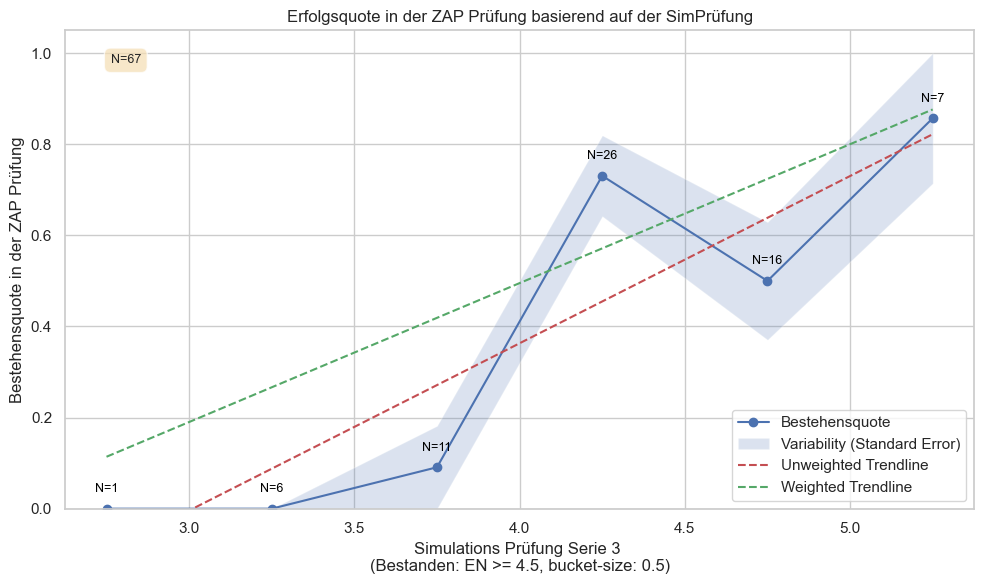

In [6]:
# Deutsch SimPrüfung Stats Tabelle
pattern_serien = r"SP[1-3]\.2$" # $ works like an anchor - so it has to match the end of the string
serien = [item for item in df.columns if re.match(pattern_serien, item)]
erfolgsnote = "ZAP2-D"

df_stats, m_table = calc_stats_table(df, df_names, sn=serien, en=erfolgsnote)
dfi.export(m_table, "d_simpr_stats_table.png", table_conversion='matplotlib')
# save_styled_dataframe_to_png(m_table, "d_simpr_stats_table.png", width=2600, height=600, row_name_width_px=150, min_column_width_px=110)


# Korellationstabellen
for i, serie in enumerate(serien):
    corr_table = calc_corr_table(df, df_names, (f"SP{i+1}D.1.", f"SP{i+1}D.2."), serie, erfolgsnote)
    dfi.export(corr_table, f"d_simpr{i+1}_corr_table.png", table_conversion='matplotlib')
    # save_styled_dataframe_to_png(corr_table, f"d_simpr{i+1}_corr_table.png", width=1800, height=600, row_name_width_px=150, min_column_width_px=80)


# Scatter Plots und Histogramme
xtic = ['Serie 1 (all)', 'Serie 2 (all)', 'Serie 3 (all)', 
        'Serie 1 (mit EN)', 'Serie 2 (mit EN)', 'Serie 3 (mit EN)',
        'EN (Serie 1)', 'EN (Serie 2)', 'EN (Serie 3)']
x_lineplot = ['Serie 1', 'Serie 2', 'Serie 3']
generate_plots_tryexcept(df_stats, sn=serien, en=erfolgsnote, xtic=xtic, x_labels_lineplot=x_lineplot, show_fig=False)


create_word_report_tryexcept(
    title="Leistungsdaten Analyse ZAP2_D SimPr (2024/25)",
    stats_table_png_path="d_simpr_stats_table.png",
    overview_paths=["d_line_plot.png", "d_violin_plot.png", "d_pass_fail_bar_plot.png", "d_all_success_chance.png"],
    scatter_plot_paths=[f"d_simpr{i}_vs_zap2-d.png" for i in range(1, len(serien)+1)],
    histogram_paths=[f"d_simpr{i}_histograms.png" for i in range(1, len(serien)+1)],
    success_paths=[f"d_simpr{i}_success_chance.png" for i in range(1, len(serien)+1)],
    corr_table_paths=[f"d_simpr{i}_corr_table.png" for i in range(1, len(serien)+1)],
    output_filename=f"Leistungsdaten Analyse ZAP2_D SimPr 2024-25 ({date_str}).docx",
    remove_files=True
)

#### D Aufsatz

In [ ]:
# Deutsch SimPrüfung Stats Tabelle
pattern_serien = r"SP[1-3]\.1$" # $ works like an anchor - so it has to match the end of the string
serien = [item for item in df.columns if re.match(pattern_serien, item)]
erfolgsnote = "ZAP2-AN"

df_stats, m_table = calc_stats_table(df, df_names, sn=serien, en=erfolgsnote)
dfi.export(m_table, "an_simpr_stats_table.png", table_conversion='matplotlib')
#save_styled_dataframe_to_png(m_table, "an_simpr_stats_table.png", width=2600, height=600, row_name_width_px=150, min_column_width_px=110)


# Scatter Plots und Histogramme
xtic = ['Serie 1 (all)', 'Serie 2 (all)', 'Serie 3 (all)', 
        'Serie 1 (mit EN)', 'Serie 2 (mit EN)', 'Serie 3 (mit EN)',
        'EN (Serie 1)', 'EN (Serie 2)', 'EN (Serie 3)']
x_lineplot = ['Serie 1', 'Serie 2', 'Serie 3']
generate_plots_tryexcept(df_stats, sn=serien, en=erfolgsnote, xtic=xtic, x_labels_lineplot=x_lineplot, show_fig=False)


create_word_report_tryexcept(
    title="Leistungsdaten Analyse ZAP2_AN SimPr (2024/25)",
    stats_table_png_path="an_simpr_stats_table.png",
    overview_paths=["an_line_plot.png", "an_violin_plot.png", "an_pass_fail_bar_plot.png", "an_all_success_chance.png"],
    scatter_plot_paths=[f"an_simpr{i}_vs_zap2-an.png" for i in range(1, 6)],
    histogram_paths=[f"an_simpr{i}_histograms.png" for i in range(1, 6)],
    success_paths=[f"an_simpr{i}_success_chance.png" for i in range(1, 6)],
    corr_table_paths=[f"an_simpr{i}_corr_table.png" for i in range(1, 6)],
    output_filename=f"Leistungsdaten Analyse ZAP2_AN SimPr 2024-25 ({date_str}).docx",
    remove_files=True
)

## ZAP 3 -----------------------------------------------------------------------------

#### Datenimport

In [9]:
# --- Configuration ---
csv_file_path = '../Data/Leistungsdaten ZAP3-V2-I-SP [Archive 2024_25].csv'
header_row = 1                              # The row number (0-indexed) containing the column names.
csv_delimiter = ','                         # The character used to separate values in the CSV file (often ',' or ';')
decimal_separator = '.'                     # The character used for decimals (often '.' or ',')
file_encoding = 'utf-8'                     # File encoding (try 'utf-8', 'latin-1', 'cp1252')

current_date = datetime.date.today()
date_str = current_date.strftime("%Y-%m-%d")


# Read the CSV file into a pandas DataFrame
df_raw = pd.read_csv(csv_file_path, header=header_row, delimiter=csv_delimiter, decimal=decimal_separator, 
                     encoding=file_encoding, skipinitialspace=True)

print("CSV file loaded successfully!")
# print("First 5 rows of the data:")
# print(df_raw.head())
print("\nDataframe Info (Columns, Data Types, Non-Null Counts):")
df_raw.info()


# --- Formatting the DataFrame ---
df_cleaned, df_names = df_formatting(df_raw)

df = df_cleaned.copy()

CSV file loaded successfully!

Dataframe Info (Columns, Data Types, Non-Null Counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Columns: 142 entries, SUS to Resultat
dtypes: float64(7), object(135)
memory usage: 335.2+ KB
/nDropped unnamed columns.
/nThe column_id is mapped to the following Information: SUS             Schüler Informationen
SUS.1       Persönliche Informationen
SUS.1.1                        SuS-ID
SUS.2           Klassen Informationen
SUS.2.1                      Kurs-Nr.
                      ...            
ZAP3-GN                    Gesamtnote
ZAP3-AN                   Aufsatznote
ZAP3-D           Prüfungsnote Deutsch
ZAP3-M             Prüfungsnote Mathe
Resultat                     Resultat
Name: 0, Length: 135, dtype: object

The first 5 rows of the cleaned df: 
    SUS SUS.1            SUS.1.1 SUS.2           SUS.2.1 SUS.2.2 SUS.2.3  \
7   NaN   NaN   5-ZAP3a-Anna Pa.   NaN  5-ZAP3a-P5L-Sa1e     NaN     NaN   
8   NaN   NaN  5-ZAP3

#### M Sim

In [ ]:
# Mathe SimPrüfung Stats Tabelle
pattern_serien = r"SP[1-2]\.[1-2]\.7$" # $ works like an anchor - so it has to match the end of the string
serien = [item for item in df.columns if re.match(pattern_serien, item)]
print(serien)
erfolgsnote = "ZAP3-M"


df_stats, m_table = calc_stats_table(df, df_names, sn=serien, en=erfolgsnote)
dfi.export(m_table, "m_simpr_stats_table.png", table_conversion='matplotlib')
#save_styled_dataframe_to_png(m_table, "m_simpr_stats_table.png", width=2600, height=500, row_name_width_px=150, min_column_width_px=110)


# Korellationstabellen
for i, serie in enumerate(serien):
    corr_table = calc_corr_table(df, df_names, f"SP{i+1}M", serie, erfolgsnote)
    dfi.export(corr_table, f"m_simpr{i+1}_corr_table.png", table_conversion='matplotlib')
    #save_styled_dataframe_to_png(corr_table, f"m_simpr{i+1}_corr_table.png", width=1900, height=600, row_name_width_px=150, min_column_width_px=80)


# Scatter Plots und Histogramme
xtic = ['Serie 1 (all)', 'Serie 2 (all)',
        'Serie 1 (mit EN)', 'Serie 2 (mit EN)',
        'EN (Serie 1)', 'EN (Serie 2)']
x_lineplot = ['Serie 1', 'Serie 2']
generate_plots_tryexcept(df_stats, sn=serien, en=erfolgsnote, xtic=xtic, x_labels_lineplot=x_lineplot, show_fig=False)


create_word_report_tryexcept(
    title="Leistungsdaten Analyse ZAP3_M SimPr (2024/25)",
    stats_table_png_path="m_simpr_stats_table.png",
    overview_paths=["m_line_plot.png", "m_violin_plot.png", "m_pass_fail_bar_plot.png", "m_all_success_chance.png"],
    scatter_plot_paths=[f"m_simpr{i}_vs_zap3-m.png" for i in range(1, 6)],
    histogram_paths=[f"m_simpr{i}_histograms.png" for i in range(1, 6)],
    success_paths=[f"m_simpr{i}_success_chance.png" for i in range(1, 6)],
    corr_table_paths=[f"m_simpr{i}_corr_table.png" for i in range(1, 6)],
    output_filename=f"Leistungsdaten Analyse ZAP3_M SimPr 2024-25 ({date_str}).docx",
    remove_files=True
)


#### D Sim

C:\Users\elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: Degrees of freed

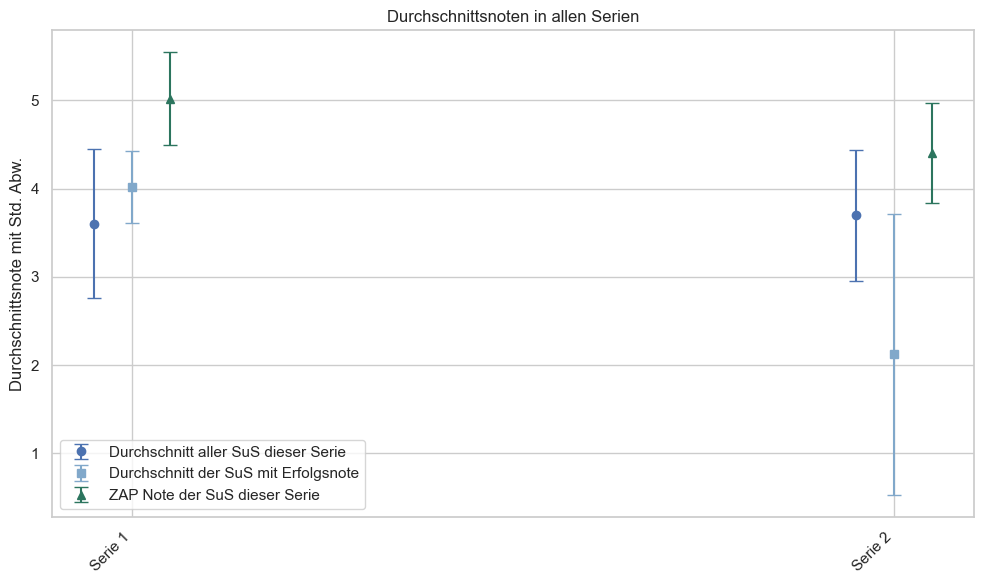

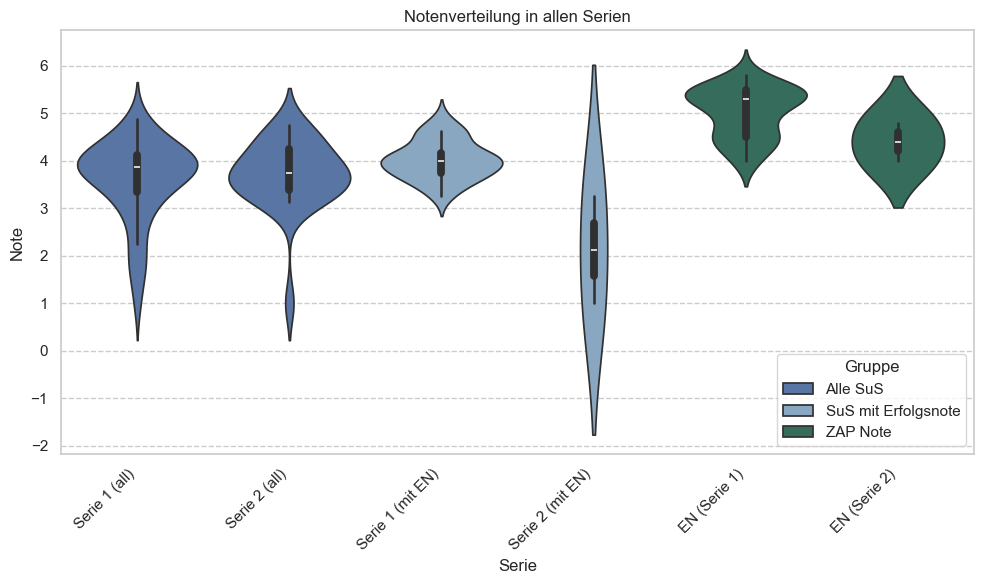

Plots generated successfully!
Word report 'Leistungsdaten Analyse ZAP3_D SimPr 2024-25 (2025-07-02).docx' created successfully!


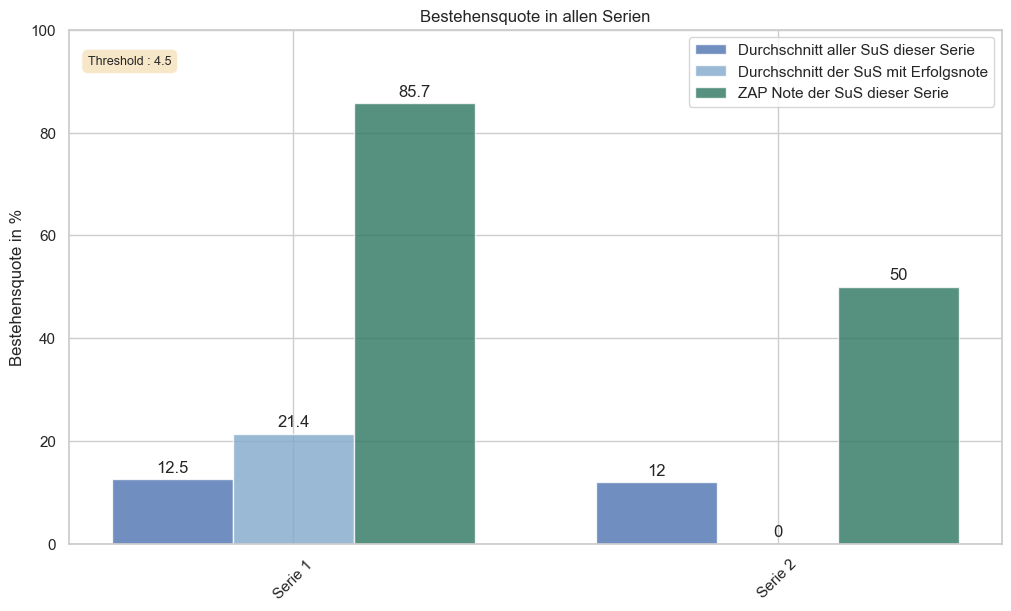

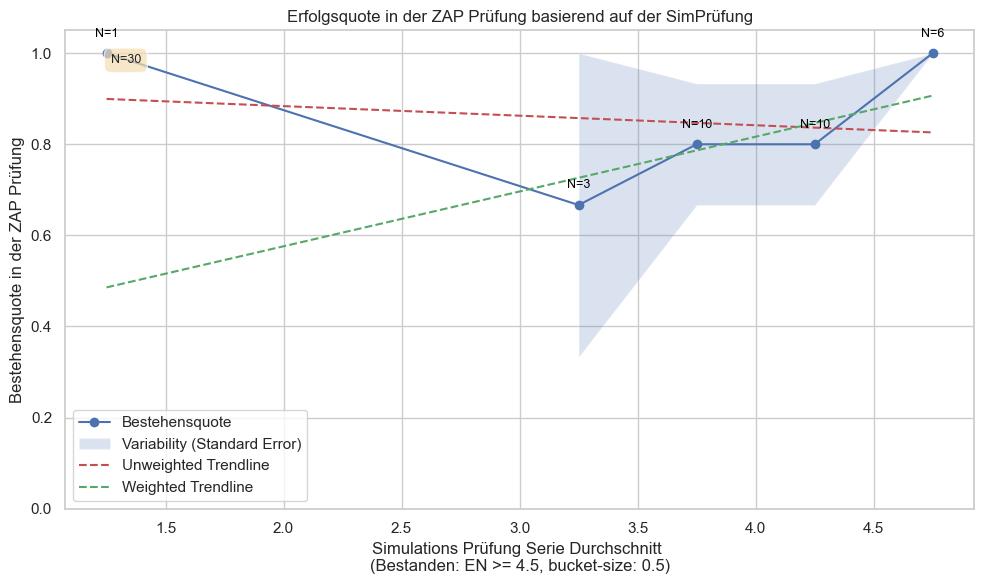

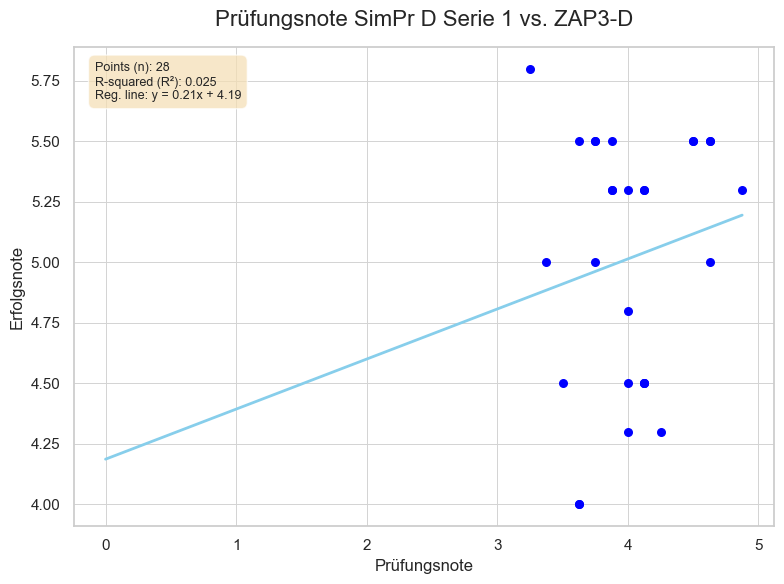

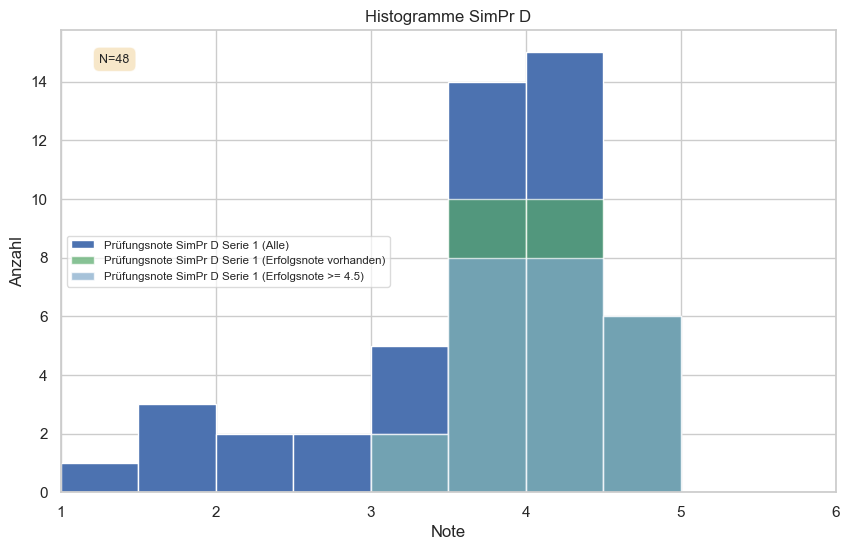

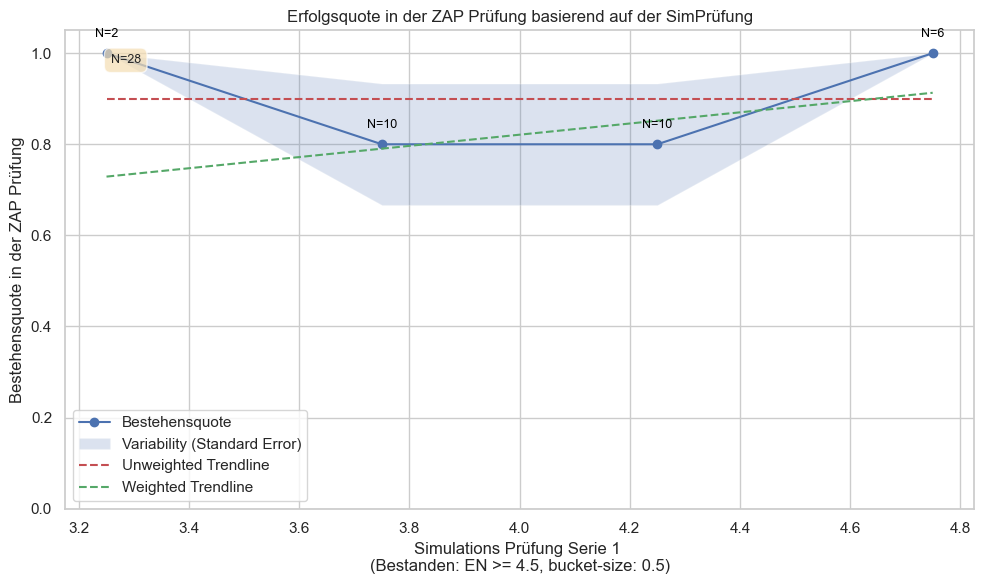

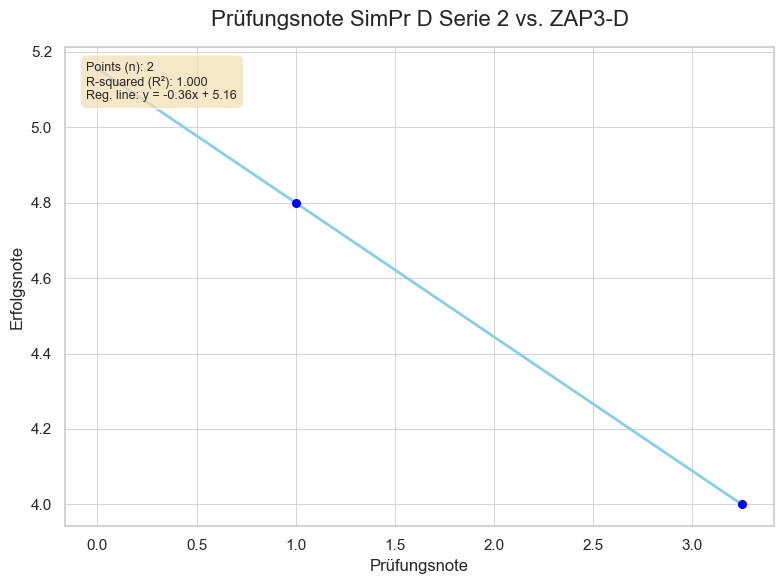

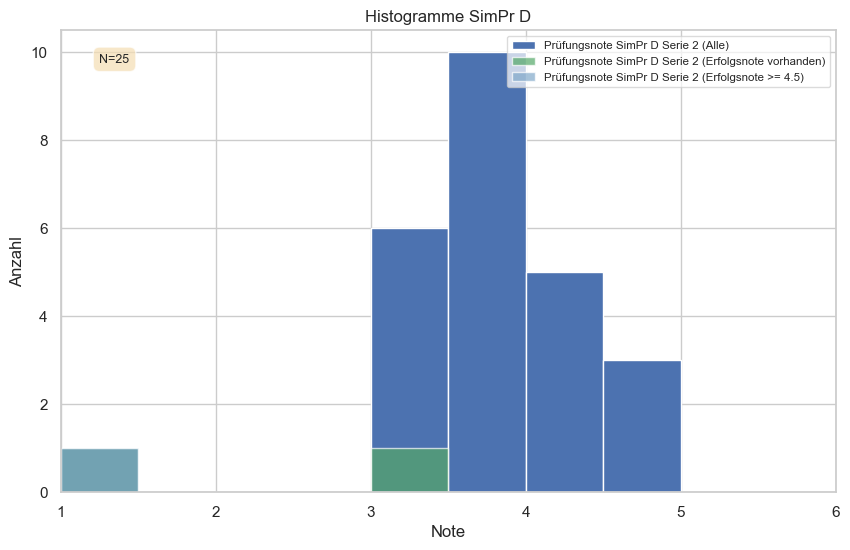

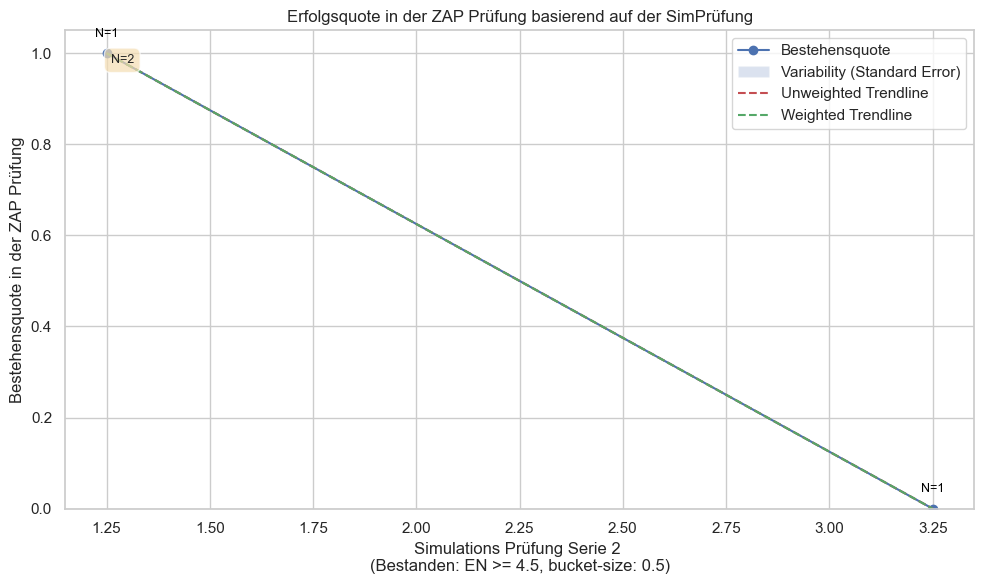

In [10]:
# Deutsch SimPrüfung Stats Tabelle
pattern_serien = r"SP[1-2]\.[1-2]\.3$" # $ works like an anchor - so it has to match the end of the string
serien = [item for item in df.columns if re.match(pattern_serien, item)]
erfolgsnote = "ZAP3-D"

df_stats, m_table = calc_stats_table(df, df_names, sn=serien, en=erfolgsnote)
dfi.export(m_table, "d_simpr_stats_table.png", table_conversion='matplotlib')
#save_styled_dataframe_to_png(m_table, "d_simpr_stats_table.png", width=2600, height=600, row_name_width_px=150, min_column_width_px=110)


# Korellationstabellen
for i, serie in enumerate(serien):
    corr_table = calc_corr_table(df, df_names, (f"SP{i+1}D.1.", f"SP{i+1}D.2."), serie, erfolgsnote)
    dfi.export(corr_table, f"d_simpr{i+1}_corr_table.png", table_conversion='matplotlib')
    #save_styled_dataframe_to_png(corr_table, f"d_simpr{i+1}_corr_table.png", width=1800, height=600, row_name_width_px=150, min_column_width_px=80)


# Scatter Plots und Histogramme
xtic = ['Serie 1 (all)', 'Serie 2 (all)',
        'Serie 1 (mit EN)', 'Serie 2 (mit EN)',
        'EN (Serie 1)', 'EN (Serie 2)']
x_lineplot = ['Serie 1', 'Serie 2']
generate_plots_tryexcept(df_stats, sn=serien, en=erfolgsnote, xtic=xtic, x_labels_lineplot=x_lineplot, show_fig=False)


create_word_report_tryexcept(
    title="Leistungsdaten Analyse ZAP3_D SimPr (2024/25)",
    stats_table_png_path="d_simpr_stats_table.png",
    overview_paths=["d_line_plot.png", "d_violin_plot.png", "d_pass_fail_bar_plot.png", "d_all_success_chance.png"],
    scatter_plot_paths=[f"d_simpr{i}_vs_zap3-d.png" for i in range(1, len(serien)+1)],
    histogram_paths=[f"d_simpr{i}_histograms.png" for i in range(1, len(serien)+1)],
    success_paths=[f"d_simpr{i}_success_chance.png" for i in range(1, len(serien)+1)],
    corr_table_paths=[f"d_simpr{i}_corr_table.png" for i in range(1, len(serien)+1)],
    output_filename=f"Leistungsdaten Analyse ZAP3_D SimPr 2024-25 ({date_str}).docx",
    remove_files=True
)

#### D Aufsatz

In [ ]:
# Deutsch SimPrüfung Stats Tabelle
pattern_serien = r"SP[1-2]\.[1-2]\.1$" # $ works like an anchor - so it has to match the end of the string
serien = [item for item in df.columns if re.match(pattern_serien, item)]
erfolgsnote = "ZAP3-AN"

df_stats, m_table = calc_stats_table(df, df_names, sn=serien, en=erfolgsnote)
dfi.export(m_table, "an_simpr_stats_table.png", table_conversion='matplotlib')
#save_styled_dataframe_to_png(m_table, "an_simpr_stats_table.png", width=2600, height=600, row_name_width_px=150, min_column_width_px=110)


# Scatter Plots und Histogramme
xtic = ['Serie 1 (all)', 'Serie 2 (all)',
        'Serie 1 (mit EN)', 'Serie 2 (mit EN)',
        'EN (Serie 1)', 'EN (Serie 2)']
x_lineplot = ['Serie 1', 'Serie 2']
generate_plots_tryexcept(df_stats, sn=serien, en=erfolgsnote, xtic=xtic, x_labels_lineplot=x_lineplot, show_fig=False)


create_word_report_tryexcept(
    title="Leistungsdaten Analyse ZAP3_AN SimPr (2024/25)",
    stats_table_png_path="an_simpr_stats_table.png",
    overview_paths=["an_line_plot.png", "an_violin_plot.png", "an_pass_fail_bar_plot.png", "an_all_success_chance.png"],
    scatter_plot_paths=[f"an_simpr{i}_vs_zap3-an.png" for i in range(1, 6)],
    histogram_paths=[f"an_simpr{i}_histograms.png" for i in range(1, 6)],
    success_paths=[f"an_simpr{i}_success_chance.png" for i in range(1, 6)],
    corr_table_paths=[f"an_simpr{i}_corr_table.png" for i in range(1, 6)],
    output_filename=f"Leistungsdaten Analyse ZAP3_AN SimPr 2024-25 ({date_str}).docx",
    remove_files=True
)